In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
import tensorflow as tf 
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input,Conv2D, MaxPool2D, Flatten,MaxPooling2D


# 1. CNN with Coarse Dataset

### Download Coarse Datasets

In [3]:
(train_coarse_set,train_coarse_label),(test_coarse_set,test_coarse_label)=tf.keras.datasets.cifar100.load_data(label_mode='coarse')

### Dataset Information

In [4]:
print("train_coarse_set shape: ", train_coarse_set.shape)
print("train_coarse_label shape : ", train_coarse_label.shape)

print("test_coarse_set shape: ", test_coarse_set.shape)
print("test_coarse_label shape : ", test_coarse_label.shape)


train_coarse_set shape:  (50000, 32, 32, 3)
train_coarse_label shape :  (50000, 1)
test_coarse_set shape:  (10000, 32, 32, 3)
test_coarse_label shape :  (10000, 1)


In [5]:
train_coarse_classes = np.unique(train_coarse_label)
tot_coarse_classes = len(train_coarse_classes)
print(train_coarse_classes)
print(tot_coarse_classes)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
20


In [6]:
coarse_classes=["aquatic mammals","fish","flowers","food containers","fruit and vegetables","household electrical devices","household furniture","insects","large carnivores","large man-made outdoor things","large natural outdoor scenes","large omnivores and herbivores","medium-sized mammals","non-insect invertebrates","people","reptiles","small mammals","trees","vehicles 1","vehicles 2"]


In [7]:
pd.Series(train_coarse_label[:,0]).value_counts()


19    2500
18    2500
1     2500
2     2500
3     2500
4     2500
5     2500
6     2500
7     2500
8     2500
9     2500
10    2500
11    2500
12    2500
13    2500
14    2500
15    2500
16    2500
17    2500
0     2500
dtype: int64

In [8]:
pd.Series(test_coarse_label[:,0]).value_counts()

15    500
7     500
8     500
16    500
1     500
9     500
17    500
2     500
10    500
18    500
3     500
11    500
19    500
4     500
12    500
5     500
13    500
6     500
14    500
0     500
dtype: int64

### Normalize Data

In [9]:
train_coarse_set = train_coarse_set.astype('float32')
test_coarse_set = test_coarse_set.astype('float32')


train_coarse_set = train_coarse_set/ 255
test_coarse_set = test_coarse_set/ 255

### Vizualize an Image

In [10]:
index =1
print(train_coarse_set[index])

[[[1.         1.         1.        ]
  [0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]
  ...
  [0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 ...

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]


Text(0.5, 0.98, 'Image label : [15]')

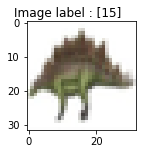

In [11]:
plt.figure(figsize=(15,2))
plt.imshow(train_coarse_set[index])
plt.suptitle(f'Image label : {train_coarse_label[index]}')


### Converting label vectors to categorical data matrix

In [12]:
train_coarse_label = keras.utils.to_categorical(train_coarse_label, tot_coarse_classes)
test_coarse_label = keras.utils.to_categorical(test_coarse_label, tot_coarse_classes)

In [13]:
train_coarse_label

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

### Reshape Data

In [14]:
train_coarse_set = train_coarse_set.reshape(-1,32,32,3)
test_coarse_set = test_coarse_set.reshape(-1,32,32,3)
print(train_coarse_set.shape)

(50000, 32, 32, 3)


### Build the model


In [15]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu',input_shape=(32, 32, 3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(20,activation="softmax"))


model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

### Train the model

In [16]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history=model.fit(train_coarse_set, train_coarse_label, epochs=100, validation_split=0.1)

Epoch 1/100
1407/1407 [==============================] - 25s 9ms/step - loss: 2.5728 - accuracy: 0.1989 - val_loss: 2.3973 - val_accuracy: 0.2574
Epoch 2/100
1407/1407 [==============================] - 13s 9ms/step - loss: 2.2540 - accuracy: 0.2972 - val_loss: 2.1209 - val_accuracy: 0.3382
Epoch 3/100
1407/1407 [==============================] - 13s 9ms/step - loss: 2.1037 - accuracy: 0.3434 - val_loss: 2.0323 - val_accuracy: 0.3722
Epoch 4/100
1407/1407 [==============================] - 13s 9ms/step - loss: 2.0016 - accuracy: 0.3770 - val_loss: 1.9163 - val_accuracy: 0.4108
Epoch 5/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.9175 - accuracy: 0.4029 - val_loss: 1.8628 - val_accuracy: 0.4210
Epoch 6/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.8646 - accuracy: 0.4168 - val_loss: 1.7895 - val_accuracy: 0.4404
Epoch 7/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.8029 - accuracy: 0.4349 - val_loss: 1.8418 -

 ## Plotting training curves: Accuracy and Loss curves

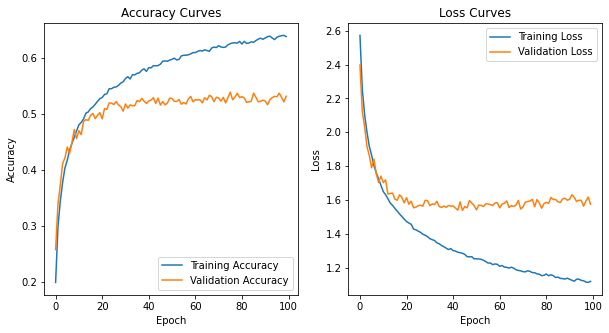

In [17]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

### Evaluate the Train Accuracy

In [19]:
train_coarse_results = model.evaluate(train_coarse_set,train_coarse_label)
print(f'Train set loss: {train_coarse_results[0]:0.2f}, Train set accuracy: {train_coarse_results[1]*100:0.2f}%')


1563/1563 [==============================] - 7s 5ms/step - loss: 0.7431 - accuracy: 0.7805
Train set loss: 0.74, Train set accuracy: 78.05%


### Evaluate Test Accuracy

In [18]:
results = model.evaluate(test_coarse_set,test_coarse_label)
print(f'Test set loss: {results[0]:0.2f}, test set accuracy: {results[1]*100:0.2f}%')


313/313 [==============================] - 2s 5ms/step - loss: 1.5939 - accuracy: 0.5276
Test set loss: 1.59, test set accuracy: 52.76%


### Make Predictions

In [20]:
predictions = model.predict(test_coarse_set)
predictions=np.argmax(predictions,axis=1)

test_coarse_label = np.argmax(test_coarse_label, axis=1)


### Confusion Matrix

In [21]:
confusion = confusion_matrix(test_coarse_label,predictions)
confusion

array([[201,  37,   0,   6,   1,   3,   9,   9,  19,  10,   4,  35,  37,
         15,   5,  37,  53,   1,  11,   7],
       [ 38, 236,   8,   9,  14,   4,   7,  13,   8,   8,   7,  13,   9,
         23,  11,  38,  30,   1,  15,   8],
       [  1,   7, 339,  11,  43,   5,   3,  38,   6,   1,   2,   3,   3,
         10,   5,   4,   6,   2,   9,   2],
       [  4,  12,  10, 243,  13,  31,  37,  14,  12,   7,   2,   8,   5,
         17,  26,   7,  26,   3,   9,  14],
       [  2,   7,  41,  10, 295,   2,   4,  28,  16,   2,   0,  21,   4,
         23,   7,   7,  21,   0,   6,   4],
       [  6,  10,   8,  47,   6, 204,  56,  10,  11,  14,   6,  13,   3,
         17,  15,  18,  13,   5,  24,  14],
       [  3,  11,   5,  17,   6,  25, 313,   9,   5,  12,   7,   8,   3,
         11,   9,  12,  10,   0,  23,  11],
       [  7,   6,  14,   3,   8,   2,   4, 287,  18,   4,   2,  13,  10,
         41,   2,  21,  26,   2,  17,  13],
       [ 17,   1,   1,   4,   1,   2,   4,  13, 245,   2,   4,  

In [22]:
sns.set(rc = {'figure.figsize':(300,200)})
sns.heatmap(confusion, annot=True,xticklabels=1)
 

# 2. CNN with Fine Label Set

### Download dataset with fine label set 

In [4]:
(train_fine_set,train_fine_label),(test_fine_set,test_fine_label)=tf.keras.datasets.cifar100.load_data(label_mode='fine')


### Dataset Information

In [5]:
print("train_fine_set shape: ", train_fine_set.shape)
print("train_fine_label shape : ", train_fine_label.shape)

print("test_fine_set shape: ", test_fine_set.shape)
print("test_fine_label shape : ", test_fine_label.shape)

print()

train_fine_set shape:  (50000, 32, 32, 3)
train_fine_label shape :  (50000, 1)
test_fine_set shape:  (10000, 32, 32, 3)
test_fine_label shape :  (10000, 1)



In [6]:
train_fine_classes = np.unique(train_fine_label)
tot_fine_classes = len(train_fine_classes)
print(train_fine_classes)
print(tot_fine_classes)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
100


In [7]:
pd.Series(train_fine_label[:,0]).value_counts()

95    500
74    500
39    500
71    500
8     500
     ... 
85    500
22    500
54    500
86    500
0     500
Length: 100, dtype: int64

In [8]:
pd.Series(test_fine_label[:,0]).value_counts()

95    100
82    100
2     100
10    100
18    100
     ... 
45    100
53    100
61    100
69    100
0     100
Length: 100, dtype: int64

### Data Normalization

In [9]:
train_fine_set = train_fine_set.astype('float32')
test_fine_set = test_fine_set.astype('float32')

train_fine_set = train_fine_set/ 255
test_fine_set = test_fine_set/ 255

### Visualize an Images

In [10]:
index =1
print(train_fine_set[index])

[[[1.         1.         1.        ]
  [0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]
  ...
  [0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 ...

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]


Text(0.5, 0.98, 'Image label : [29]')

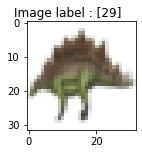

In [11]:
plt.figure(figsize=(15,2))
plt.imshow(train_fine_set[index])
plt.suptitle(f'Image label : {train_fine_label[index]}')


### Converting label vectors to categorical data matrix

In [12]:
train_fine_label = keras.utils.to_categorical(train_fine_label, tot_fine_classes)
test_fine_label = keras.utils.to_categorical(test_fine_label, tot_fine_classes)

### Reshape data

In [13]:
train_fine_set = train_fine_set.reshape(-1,32,32,3)
test_fine_set = test_fine_set.reshape(-1,32,32,3)
print(train_fine_set.shape)

(50000, 32, 32, 3)


### Building the CNN model

In [14]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu',input_shape=(32, 32, 3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(100,activation="softmax"))


model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

### Train the model

In [15]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history=model.fit(train_fine_set, train_fine_label, epochs=100, validation_split=0.1)

Epoch 1/100
1407/1407 [==============================] - 24s 10ms/step - loss: 4.1453 - accuracy: 0.0592 - val_loss: 3.7859 - val_accuracy: 0.1082
Epoch 2/100
1407/1407 [==============================] - 14s 10ms/step - loss: 3.6221 - accuracy: 0.1402 - val_loss: 3.3894 - val_accuracy: 0.1842
Epoch 3/100
1407/1407 [==============================] - 13s 10ms/step - loss: 3.3526 - accuracy: 0.1881 - val_loss: 3.2185 - val_accuracy: 0.2242
Epoch 4/100
1407/1407 [==============================] - 13s 9ms/step - loss: 3.1957 - accuracy: 0.2175 - val_loss: 3.0523 - val_accuracy: 0.2458
Epoch 5/100
1407/1407 [==============================] - 13s 10ms/step - loss: 3.0773 - accuracy: 0.2375 - val_loss: 2.9465 - val_accuracy: 0.2730
Epoch 6/100
1407/1407 [==============================] - 13s 9ms/step - loss: 2.9869 - accuracy: 0.2530 - val_loss: 2.9174 - val_accuracy: 0.2738
Epoch 7/100
1407/1407 [==============================] - 13s 10ms/step - loss: 2.9103 - accuracy: 0.2722 - val_loss: 2.8

##  Plotting training curves: Accuracy and Loss curves

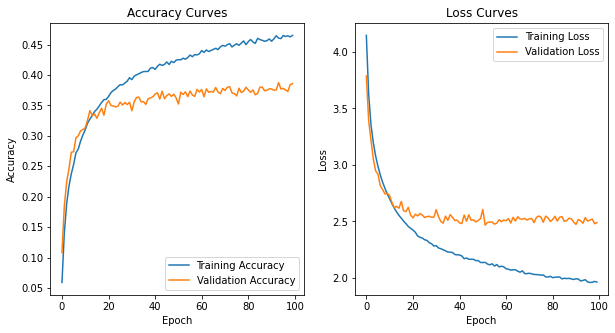

In [16]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

### Evaluate Train Accuracy

In [18]:
train_fine_results = model.evaluate(train_fine_set,train_fine_label)
print(f'Train set loss: {train_fine_results[0]:0.2f}, Train set accuracy: {train_fine_results[1]*100:0.2f}%')


1563/1563 [==============================] - 8s 5ms/step - loss: 1.4205 - accuracy: 0.6154
Train set loss: 1.42, Train set accuracy: 61.54%


### Evaluate Test Accuracy

In [17]:
results = model.evaluate(test_fine_set,test_fine_label)
print(f'Test set loss: {results[0]:0.2f}, test set accuracy: {results[1]*100:0.2f}%')


313/313 [==============================] - 2s 5ms/step - loss: 2.4509 - accuracy: 0.3917
Test set loss: 2.45, test set accuracy: 39.17%


### Make Predictions

In [19]:
predictions = model.predict(test_fine_set)
predictions=np.argmax(predictions,axis=1)

test_fine_label = np.argmax(test_fine_label, axis=1)


### Confusion Matrix

In [20]:
confusion = confusion_matrix(test_fine_label,predictions)
confusion

array([[71,  1,  1, ...,  0,  0,  0],
       [ 2, 52,  1, ...,  0,  0,  0],
       [ 1,  0, 36, ...,  0,  3,  0],
       ...,
       [ 0,  0,  0, ..., 41,  0,  0],
       [ 0,  0, 10, ...,  1, 10,  0],
       [ 0,  1,  1, ...,  0,  0, 33]])

In [21]:
sns.set(rc = {'figure.figsize':(300,200)})
sns.heatmap(confusion, annot=True,xticklabels=1)
  
